# California Housing Price Prediction

download dataset from here [https://www.kaggle.com/camnugent/california-housing-prices](https://www.kaggle.com/camnugent/california-housing-prices)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!dir | findstr -i housing.csv

In [3]:
housing = pd.read_excel("housing.xlsx")
housing.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


there are 20640 instances & 'total_bedrooms' has only 20433 non-null values (207 values missing)

In [5]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


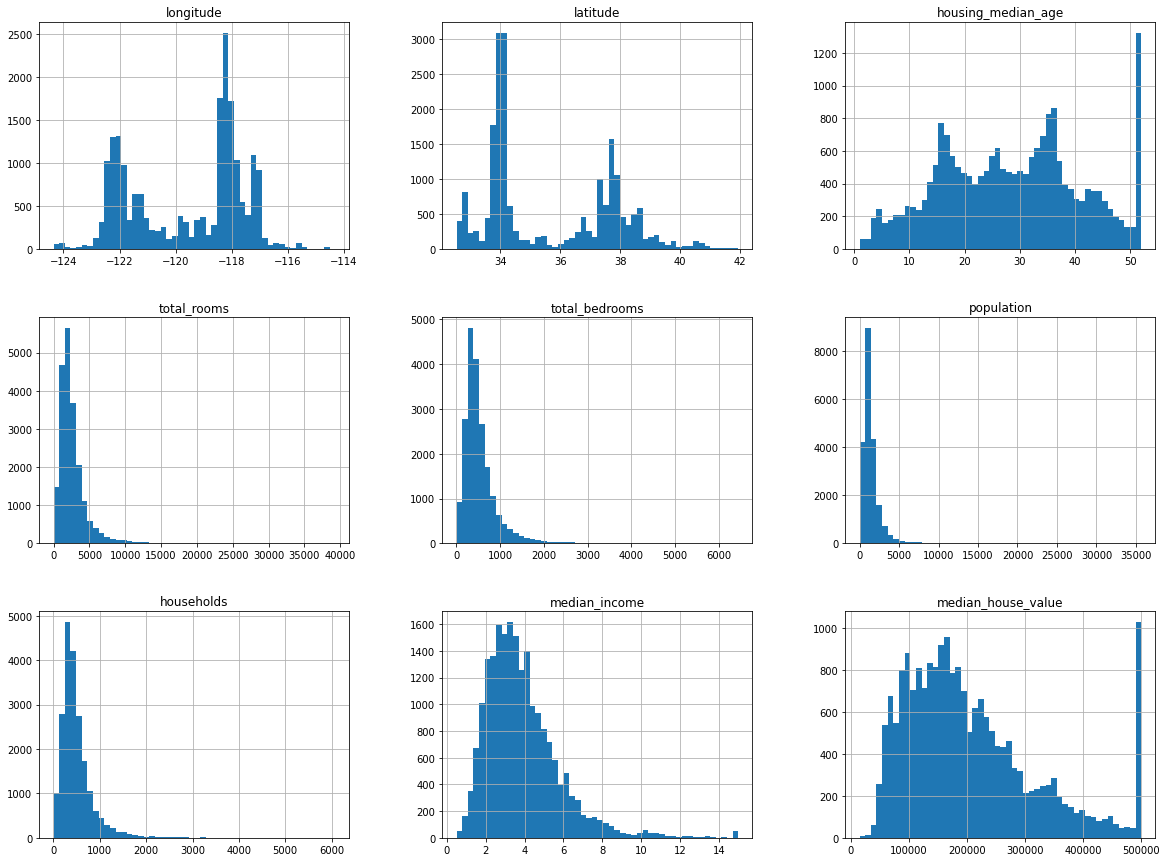

In [7]:
housing.hist(bins=50, figsize=(20, 15))
plt.show()

<AxesSubplot:>

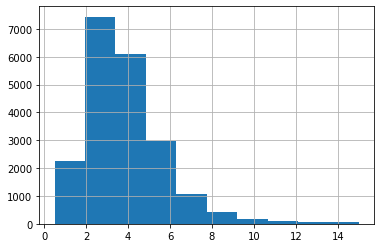

In [8]:
# median income looks like an imp feature

housing['median_income'].hist()

In [9]:
# dividing the income category to limit the number income category
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)
# putting everything above 5th category as 5th category
housing['income_cat'].where(housing['income_cat'] < 5, other=5.0, inplace=True)

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=29)

for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [11]:
housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [12]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114341
1.0    0.039971
Name: income_cat, dtype: float64

**as seen above the proportions are maintained in the test set using stratified sampling**

**[why stratified?]** : because the feature-space are less and also because its a mid-sized dataset & we don't want to miss out any class


In [13]:
# experimenting: with random sampling now

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=29)

In [14]:
def income_cat_proportions(data):
    return data['income_cat'].value_counts() / len(data)


comparing_props = pd.DataFrame({
    "Overall Props": income_cat_proportions(housing),
    "Random": income_cat_proportions(test_set),
    "Stratified": income_cat_proportions(strat_test_set)
}).sort_index()

comparing_props["random %error"] = 100 * comparing_props["Random"] / comparing_props["Overall Props"] - 100
comparing_props["strat. %error"] = 100 * comparing_props["Stratified"] / comparing_props["Overall Props"] - 100
comparing_props

,Overall Props,Random,Stratified,random %error,strat. %error
1.0,0.039826,0.042636,0.039971,7.055961,0.364964
2.0,0.318847,0.311531,0.318798,-2.294484,-0.015195
3.0,0.350581,0.344719,0.350533,-1.672195,-0.013820
4.0,0.176308,0.181686,0.176357,3.050289,0.027480
5.0,0.114438,0.119428,0.114341,4.360711,-0.084674


In [15]:
for items in (strat_train_set, strat_test_set):
    items.drop("income_cat", axis=1, inplace=True)

In [16]:
housing = strat_train_set.copy()

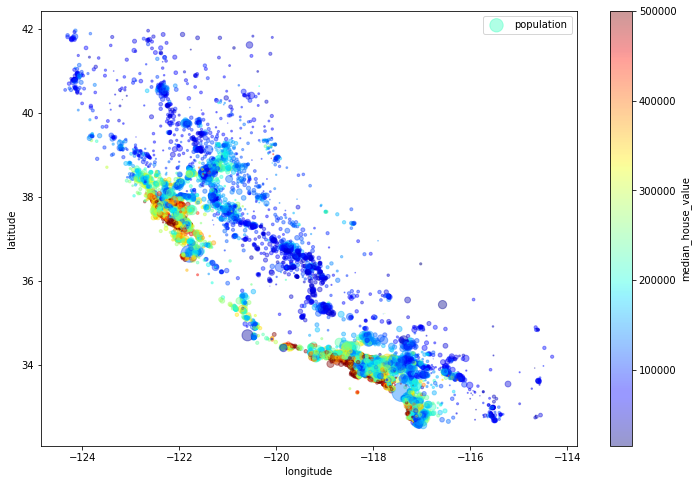

In [17]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing['population']/100, label="population", figsize=(12,8),
            c="median_house_value", cmap=plt.get_cmap("jet"), sharex=False)

plt.legend()

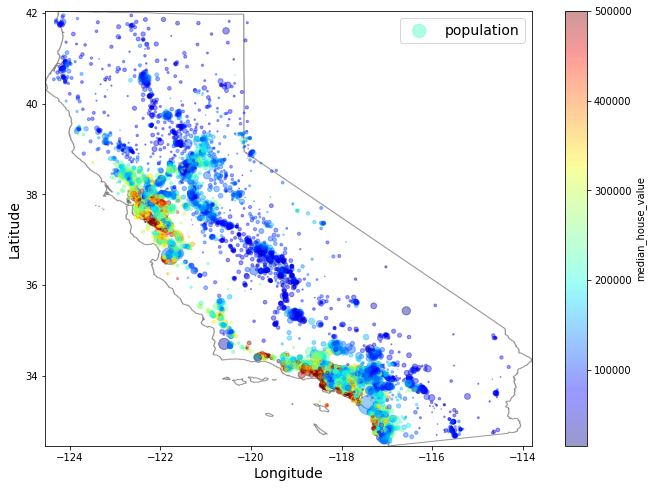

In [18]:
import matplotlib.image as mpimg

ax = housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing['population']/100, label="population", figsize=(12,8),
            c="median_house_value", cmap=plt.get_cmap("jet"), sharex=False)

# load the png image
california_img = mpimg.imread("california.png")

plt.imshow(california_img, extent=[-124.55, -113.8, 32.45, 42.05], alpha=0.5, cmap=plt.get_cmap("jet"))

plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)

plt.legend(fontsize=14)
plt.show()

### Looking for Correlations
(Pearson's Distance Correlation equation)

In [19]:
# pandas has corr method for calculating correlations
corr_matrix = housing.corr()

corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.691334
total_rooms           0.127498
housing_median_age    0.108481
households            0.060161
total_bedrooms        0.043991
population           -0.028239
longitude            -0.043977
latitude             -0.146227
Name: median_house_value, dtype: float64

its always between -1 (less correlated) and 1 (highly correlated)

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

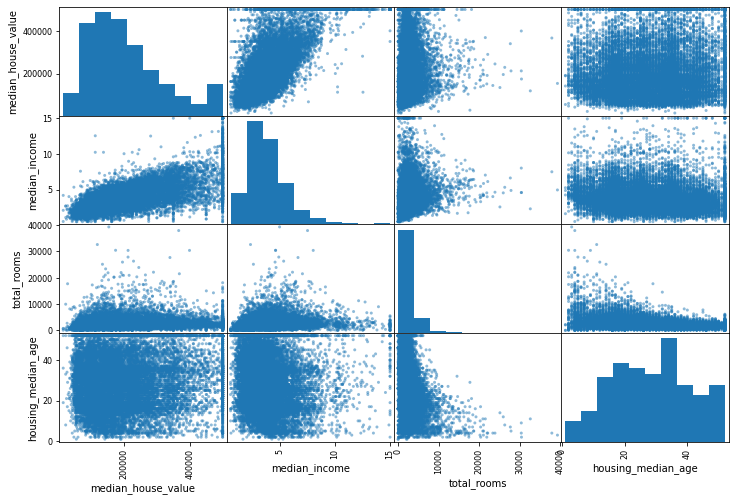

In [20]:
# other approach it to use the scatter plot in a A vs B fashion
# problem with this is that (for N features, there will be N^2 plots)

imp_attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

from pandas.plotting import scatter_matrix

scatter_matrix(housing[imp_attributes], figsize=(12, 8))

(0.0, 16.0, 0.0, 550000.0)

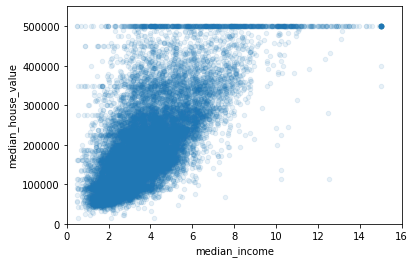

In [21]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
plt.axis([0, 16, 0, 550000])

### Feature Engineering



In [22]:
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]

In [23]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.691334
rooms_per_household         0.151990
total_rooms                 0.127498
housing_median_age          0.108481
households                  0.060161
total_bedrooms              0.043991
population_per_household   -0.021681
population                 -0.028239
longitude                  -0.043977
latitude                   -0.146227
bedrooms_per_room          -0.254016
Name: median_house_value, dtype: float64

**[observation]:** the new `bedrooms_per_room` is highly correlated but in a reciprocative way to the `median_house_value`, So the houses with lesser bedroom/room ratio will tend to be more expensive.

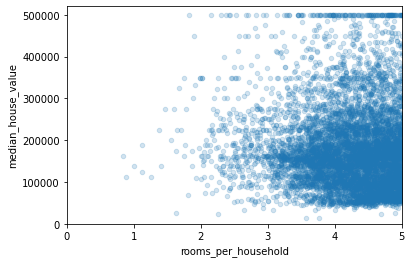

In [24]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value", alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [25]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedrooms_per_room,population_per_household,rooms_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16349.000000,16512.000000,16512.000000,16512.000000,16512.000000,16349.000000,16512.000000,16512.000000
mean,-119.574918,35.643021,28.655947,2622.391231,535.213224,1418.527798,496.885841,3.870790,206426.578428,0.212956,3.103945,5.434839
std,2.005139,2.142811,12.534525,2171.363228,421.124070,1137.469909,382.194131,1.903757,115101.402421,0.058306,11.603188,2.520729
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.100000,0.692308,0.846154
25%,-121.800000,33.930000,18.000000,1446.000000,295.000000,785.750000,279.000000,2.559950,119175.000000,0.175447,2.434051,4.443640
50%,-118.500000,34.260000,29.000000,2123.000000,433.000000,1159.000000,407.000000,3.533000,179650.000000,0.202963,2.817634,5.230475
75%,-118.010000,37.720000,37.000000,3122.000000,641.000000,1715.000000,599.000000,4.739600,264700.000000,0.239314,3.273248,6.056697
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1243.333333,141.909091


# Preparing the data for ML algos

In [26]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

#### some data cleansing

In [27]:
# when calculating imputng value on your own
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()

median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True)
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12809,-121.47,38.61,31,1072,433.0,781,281,1.6563,INLAND
10236,-117.92,33.87,33,1597,433.0,1888,423,3.0550,<1H OCEAN
4309,-118.32,34.09,44,2666,433.0,2297,726,1.6760,<1H OCEAN
3921,-118.56,34.20,35,2273,433.0,1431,403,4.0789,<1H OCEAN
16879,-122.39,37.60,34,707,433.0,381,156,4.3750,NEAR OCEAN


In [28]:
# when using Scikit-Learn's Imputer class
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [29]:
housing_num = housing.drop("ocean_proximity", axis=1)

imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [30]:
# Imputer basically computes across all the attributes, so if you wanna see this across all the attributes, just call statistics_ method
imputer.statistics_

array([-118.5  ,   34.26 ,   29.   , 2123.   ,  433.   , 1159.   ,
        407.   ,    3.533])

In [31]:
housing_num.median().values

array([-118.5  ,   34.26 ,   29.   , 2123.   ,  433.   , 1159.   ,
        407.   ,    3.533])

using the imputer we created above, transforming the training set by replacing the missing values by the learned medians

In [32]:
X = imputer.transform(housing_num)

In [33]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [34]:
# cross check for missing value
housing_tr[housing_tr.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income


In [35]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-118.11,33.85,36.0,887.0,163.0,482.0,157.0,4.1250
1,-122.04,37.33,26.0,2690.0,401.0,1264.0,429.0,7.7643
2,-117.74,34.10,29.0,2742.0,488.0,2477.0,532.0,3.5072
3,-118.39,34.23,43.0,1193.0,299.0,1184.0,320.0,2.1518
4,-117.11,32.76,21.0,2226.0,600.0,1085.0,533.0,2.2604


#### handling categorical values

In [36]:
housing_cat = housing["ocean_proximity"]
housing_cat.head(10)

8007      <1H OCEAN
18096     <1H OCEAN
5981         INLAND
3669      <1H OCEAN
14092    NEAR OCEAN
15992      NEAR BAY
10537     <1H OCEAN
6544      <1H OCEAN
948       <1H OCEAN
6193      <1H OCEAN
Name: ocean_proximity, dtype: object

In [37]:
# using pandas's own factorize() method to convert them into categorical features
housing_cat_encoded, housing_categories = housing_cat.factorize()

In [38]:
housing_cat_encoded[:10]

array([0, 0, 1, 0, 2, 3, 0, 0, 0, 0], dtype=int64)

In [39]:
housing_categories

Index(['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND'], dtype='object')

In [40]:
# using Scikit-Learn's OneHotEncoder

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(1, -1))

In [41]:
housing_cat_1hot

<1x16512 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [42]:
# since 1 hot encoder returns a sparse matrix, need to change it to a dense array
housing_cat_1hot.toarray()

array([[1., 1., 1., ..., 1., 1., 1.]])

### Custom Transformations

In [43]:
from sklearn.base import BaseEstimator, TransformerMixin

#column indexes
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self # nothing to do here
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [44]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [45]:
housing_extra_attribs = pd.DataFrame(housing_extra_attribs, columns=list(housing.columns)+["rooms_per_household", 
                                                                                           "population_per_household"])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-118.11,33.85,36,887,163.0,482,157,4.125,<1H OCEAN,5.649682,3.070064
1,-122.04,37.33,26,2690,401.0,1264,429,7.7643,<1H OCEAN,6.270396,2.946387
2,-117.74,34.1,29,2742,488.0,2477,532,3.5072,INLAND,5.154135,4.656015
3,-118.39,34.23,43,1193,299.0,1184,320,2.1518,<1H OCEAN,3.728125,3.7
4,-117.11,32.76,21,2226,600.0,1085,533,2.2604,NEAR OCEAN,4.17636,2.035647


## Setting up Pipeline for all the preprocessings

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[ 0.73060355, -0.83678622,  0.5859237 , ...,  0.08523298,
        -0.00292009, -0.45066285],
       [-1.22941925,  0.78729756, -0.21189695, ...,  0.33148459,
        -0.01357928, -0.97149216],
       [ 0.91513496, -0.72011354,  0.02744924, ..., -0.11136143,
         0.13376642, -0.53762897],
       ...,
       [ 0.201946  , -0.63144229, -0.85015347, ...,  0.13786673,
        -0.02720971, -0.4451879 ],
       [ 0.63085685, -0.73878116, -0.37146108, ..., -0.91194187,
        -0.01098173,  1.88075105],
       [-1.30921661,  1.0019753 ,  0.90505196, ..., -0.3666513 ,
        -0.02289502,  0.4161723 ]])

In [47]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, attribute_names):
        self.attibute_names = attribute_names
        
    def fit(self, X, y=None):
        return self # do nothing
    
    def transform(self, X, y=None):
        return X[self.attibute_names].values

In [48]:
# complete Pipeline

num_attribs = list(housing_num.columns)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ("selector", DataFrameSelector(num_attribs)),
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler())
])

cat_pipeline =Pipeline([
    ("selector", DataFrameSelector(cat_attribs)),
    ("cat_encoder", OneHotEncoder(sparse=False))
])

In [49]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline)
])

In [50]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[ 0.73060355, -0.83678622,  0.5859237 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.22941925,  0.78729756, -0.21189695, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.91513496, -0.72011354,  0.02744924, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.201946  , -0.63144229, -0.85015347, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.63085685, -0.73878116, -0.37146108, ...,  0.        ,
         0.        ,  0.        ],
       [-1.30921661,  1.0019753 ,  0.90505196, ...,  0.        ,
         1.        ,  0.        ]])

## Selecting & Training Models

In [51]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [52]:
# trying the full pipeline on a few training instances

some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

some_data_prepared = full_pipeline.transform(some_data)

In [53]:
print("Prediction: ", lin_reg.predict(some_data_prepared))
print("Actual Labels: ", list(some_labels))

Prediction:  [232035.89112672 380482.2530773  112115.91222308 157188.4422259
 182226.68776252]
Actual Labels:  [219500, 474700, 121900, 161600, 126300]


In [54]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)

lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

67932.7700373929

In [55]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [56]:
housing_predictions = tree_reg.predict(housing_prepared)

tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

#### Cross Validation:

In [57]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, cv=10, scoring="neg_mean_squared_error")

tree_rmse_scores = np.sqrt(-scores)

In [58]:
def display_scores(scores):
    print("scores: ", scores)
    print("mean: ", scores.mean())
    print("std deviation: ", scores.std())
    
    
display_scores(tree_rmse_scores)

scores:  [68668.80830252 70340.40676863 72482.88979356 71474.72704035
 68324.14347445 70293.61106925 71430.95924904 69569.80266116
 73989.43149389 69738.18107651]
mean:  70631.29609293542
std deviation:  1653.8951470577817


In [59]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, cv=10, scoring="neg_mean_squared_error")

lin_rmse_scores = np.sqrt(-lin_scores)

display_scores(lin_rmse_scores)

scores:  [66658.67084538 70302.86819962 71566.38526718 65233.82017541
 64574.58761208 69256.95688732 66787.77183138 71451.60918566
 65360.54454616 72252.68571338]
mean:  68344.59002635693
std deviation:  2793.4629458070845


In [60]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=29)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=29)

In [61]:
housing_pred = forest_reg.predict(housing_prepared)

forest_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, cv=10, scoring="neg_mean_squared_error")

forest_rmse_scores = np.sqrt(-forest_scores)

display_scores(forest_rmse_scores)

scores:  [66658.67084538 70302.86819962 71566.38526718 65233.82017541
 64574.58761208 69256.95688732 66787.77183138 71451.60918566
 65360.54454616 72252.68571338]
mean:  68344.59002635693
std deviation:  2793.4629458070845


## Fine Tuning Model: 

In [62]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

rf_reg = RandomForestRegressor()

grid_search = GridSearchCV(rf_reg, param_grid, cv=5, scoring="neg_mean_squared_error")

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [63]:
# to get the best combination of hyperparameters
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [64]:
# to get the best estimators directly
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [65]:
cv_res = grid_search.cv_results_

for mean_score, params in zip(cv_res["mean_test_score"], cv_res["params"]):
    print(np.sqrt(-mean_score), params)

63139.69778694233 {'max_features': 2, 'n_estimators': 3}
54906.70582030819 {'max_features': 2, 'n_estimators': 10}
51928.16410800357 {'max_features': 2, 'n_estimators': 30}
58928.908194737895 {'max_features': 4, 'n_estimators': 3}
51640.152196479576 {'max_features': 4, 'n_estimators': 10}
49545.77301255066 {'max_features': 4, 'n_estimators': 30}
58137.84133564203 {'max_features': 6, 'n_estimators': 3}
51381.08778796583 {'max_features': 6, 'n_estimators': 10}
49219.47180329693 {'max_features': 6, 'n_estimators': 30}
57648.52154407628 {'max_features': 8, 'n_estimators': 3}
51694.3858032763 {'max_features': 8, 'n_estimators': 10}
49387.98238764795 {'max_features': 8, 'n_estimators': 30}
61585.39534439703 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53472.11663703844 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
58458.61870114275 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52359.42385007819 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [66]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.068794,0.004733,0.003598,0.000615,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.995553e+09,-3.961278e+09,-4.027813e+09,-3.627858e+09,-4.320605e+09,-3.986621e+09,2.203067e+08,18
1,0.290607,0.046292,0.015936,0.006220,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.036086e+09,-3.095610e+09,-2.995316e+09,-2.799207e+09,-3.147513e+09,-3.014746e+09,1.195459e+08,11
2,0.776671,0.027222,0.034087,0.001260,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.772768e+09,-2.577870e+09,-2.714615e+09,-2.603292e+09,-2.814126e+09,-2.696534e+09,9.245723e+07,8
3,0.124077,0.011137,0.008130,0.007209,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.519410e+09,-3.368424e+09,-3.704330e+09,-3.339927e+09,-3.430990e+09,-3.472616e+09,1.312069e+08,16
4,0.391523,0.010415,0.012039,0.006932,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.771839e+09,-2.657364e+09,-2.707287e+09,-2.518663e+09,-2.678373e+09,-2.666705e+09,8.347431e+07,6
5,1.423964,0.340367,0.040585,0.006035,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.555018e+09,-2.360865e+09,-2.461770e+09,-2.368802e+09,-2.527463e+09,-2.454784e+09,7.948774e+07,3
6,0.224975,0.041101,0.005612,0.002162,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.459922e+09,-3.375353e+09,-3.381393e+09,-3.143866e+09,-3.539508e+09,-3.380009e+09,1.323730e+08,14
7,0.549768,0.039488,0.010714,0.006463,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.730556e+09,-2.602193e+09,-2.623432e+09,-2.475600e+09,-2.768299e+09,-2.640016e+09,1.033364e+08,5
8,1.595056,0.130826,0.043780,0.005237,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.512221e+09,-2.347543e+09,-2.432263e+09,-2.306807e+09,-2.513949e+09,-2.422556e+09,8.427543e+07,1
9,0.201696,0.006802,0.003388,0.006777,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.508590e+09,-3.337858e+09,-3.343537e+09,-3.143570e+09,-3.283205e+09,-3.323352e+09,1.173580e+08,12


In [67]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

params_distibs = {
    'n_estimators': randint(low=1, high=200),
    'max_features': randint(low=1, high=8),
}

rf_reg = RandomForestRegressor(random_state=29)

rnd_search = RandomizedSearchCV(rf_reg, param_distributions=params_distibs, n_iter=10, 
                                cv=5, scoring="neg_mean_squared_error", random_state=29)

rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=29),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000199467D3460>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000199467D3550>},
                   random_state=29, scoring='neg_mean_squared_error')

In [68]:
cvres = rnd_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

48652.30488118909 {'max_features': 6, 'n_estimators': 116}
49210.302973330414 {'max_features': 5, 'n_estimators': 35}
53716.76082663394 {'max_features': 1, 'n_estimators': 97}
50934.03240609825 {'max_features': 2, 'n_estimators': 114}
53709.27513301462 {'max_features': 1, 'n_estimators': 98}
48707.32431104121 {'max_features': 7, 'n_estimators': 95}
53546.26423185601 {'max_features': 1, 'n_estimators': 156}
48536.02765808571 {'max_features': 6, 'n_estimators': 149}
48564.48489506501 {'max_features': 7, 'n_estimators': 152}
53537.905784148934 {'max_features': 1, 'n_estimators': 165}


In [69]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.87529531e-02, 6.41587976e-02, 4.32786456e-02, 1.78243979e-02,
       1.62782866e-02, 1.73153518e-02, 1.56492830e-02, 3.11601856e-01,
       5.18403598e-02, 1.07976885e-01, 9.67407821e-02, 8.50629513e-03,
       1.74181051e-01, 2.82993336e-04, 2.43173619e-03, 3.18032556e-03])

In [70]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = cat_pipeline.named_steps["cat_encoder"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.31160185581533345, 'median_income'),
 (0.17418105119879926, 'INLAND'),
 (0.1079768853268172, 'pop_per_hhold'),
 (0.09674078205463642, 'bedrooms_per_room'),
 (0.06875295309082954, 'longitude'),
 (0.06415879761274648, 'latitude'),
 (0.0518403597676655, 'rooms_per_hhold'),
 (0.043278645624734706, 'housing_median_age'),
 (0.017824397924779755, 'total_rooms'),
 (0.01731535175847687, 'population'),
 (0.01627828658089381, 'total_bedrooms'),
 (0.01564928303189211, 'households'),
 (0.008506295125740863, '<1H OCEAN'),
 (0.0031803255618671183, 'NEAR OCEAN'),
 (0.002431736188655166, 'NEAR BAY'),
 (0.00028299333613172396, 'ISLAND')]

In [71]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)